<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.min()

id                 1000102
date             1/10/2015
price              78000.0
bedrooms                 1
bathrooms              0.5
sqft_living            370
sqft_lot               520
floors                 1.0
waterfront               0
view                     0
condition                1
grade                    3
sqft_above             370
sqft_basement            0
yr_built              1900
yr_renovated             0
zipcode              98001
lat                47.1559
long              -122.519
sqft_living15          399
sqft_lot15             651
dtype: object

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


<Axes: >

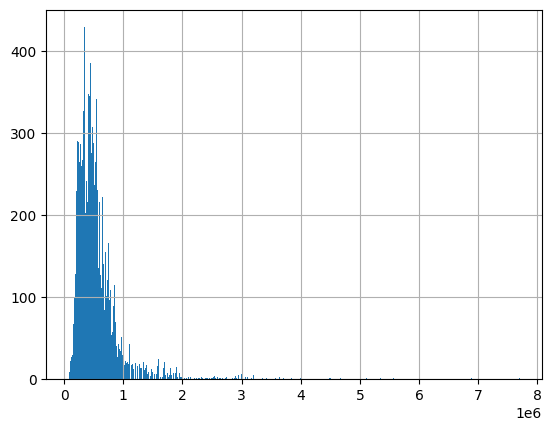

In [6]:
df['price'].hist(bins=1000)

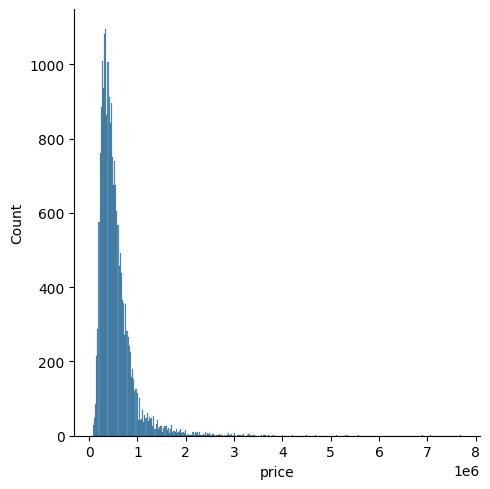

In [7]:
# plt.figure(figsize=(12,8))
# sns.distplot(df['price'])
sns.displot(df['price'])

<Axes: >

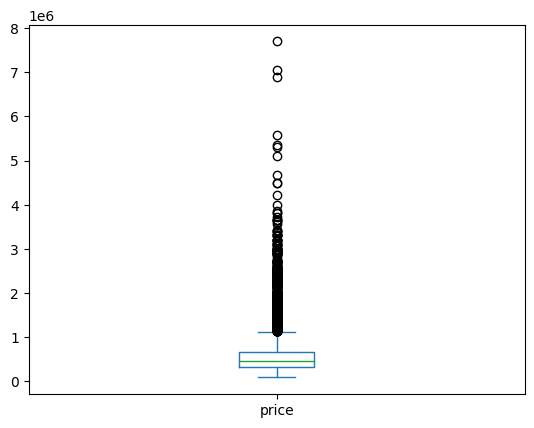

In [8]:
df['price'].plot.box()

<Axes: xlabel='bedrooms', ylabel='count'>

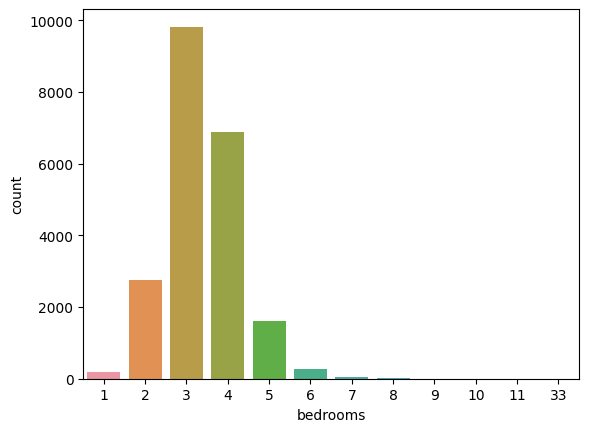

In [9]:
sns.countplot(df, x='bedrooms')

<Axes: >

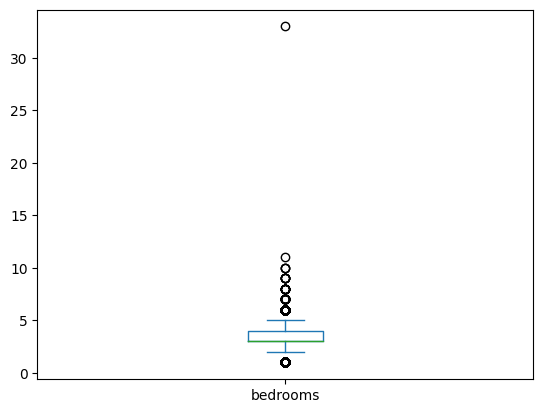

In [10]:
df['bedrooms'].plot.box()

In [11]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

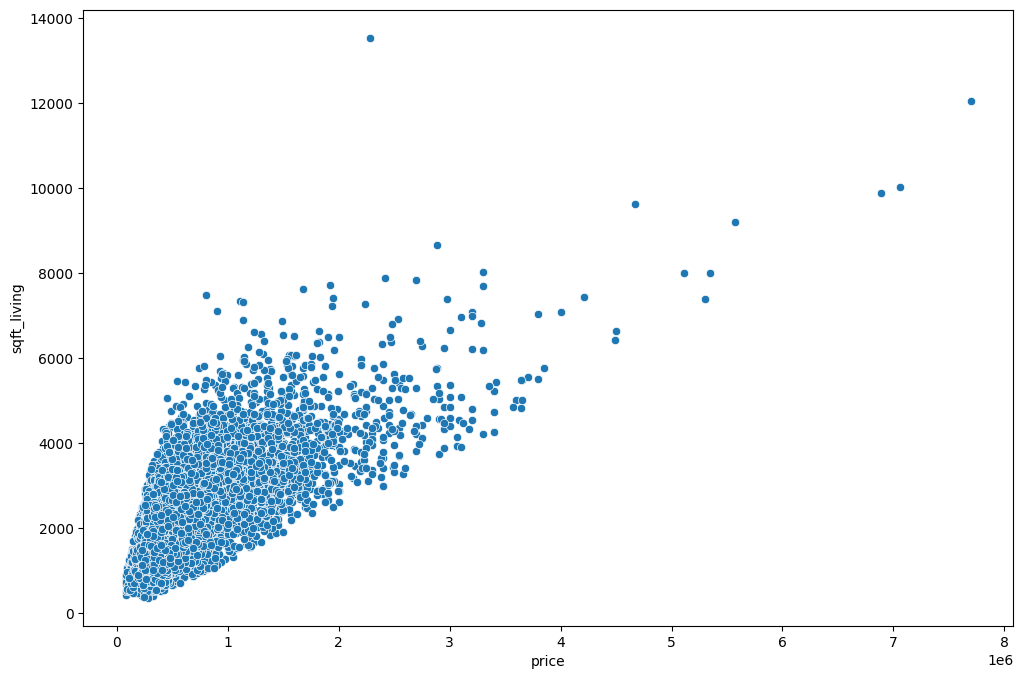

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

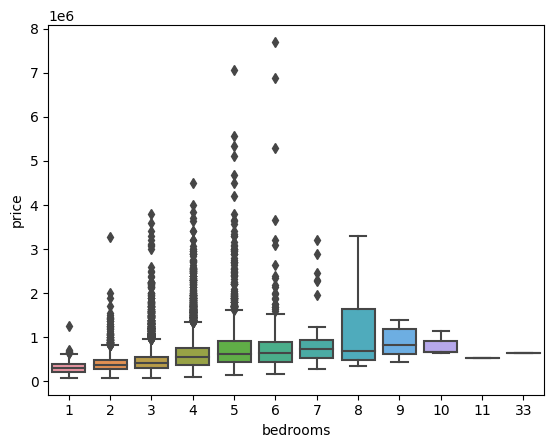

In [13]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

<Axes: xlabel='price', ylabel='long'>

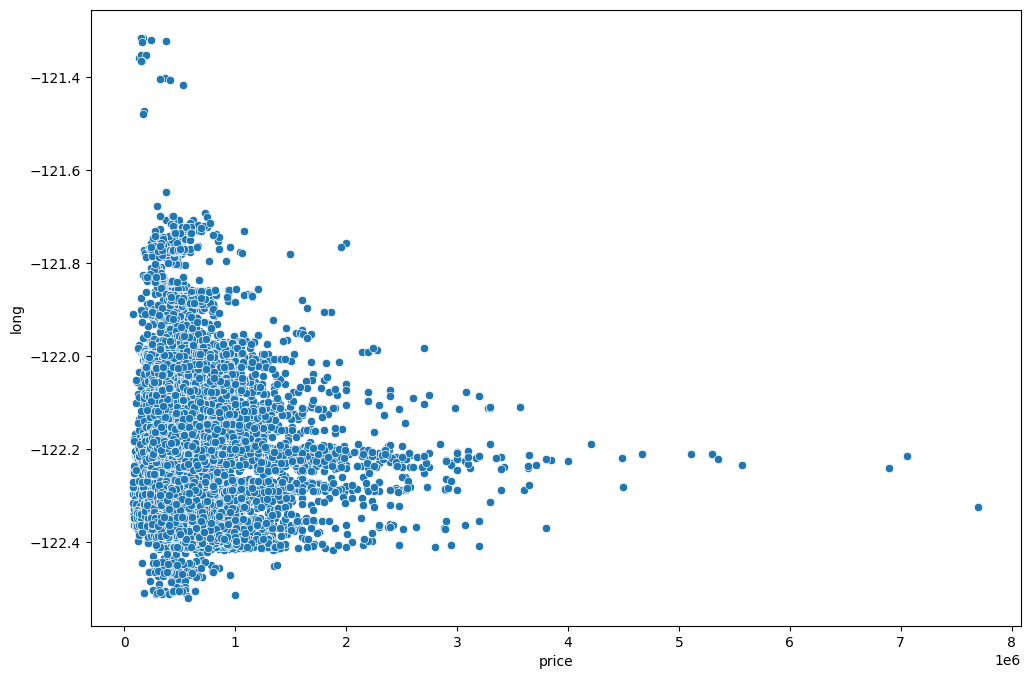

In [14]:
plt.figure(figsize=(12,8))
# sns.scatterplot(x='price',y='long',data=df)
sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

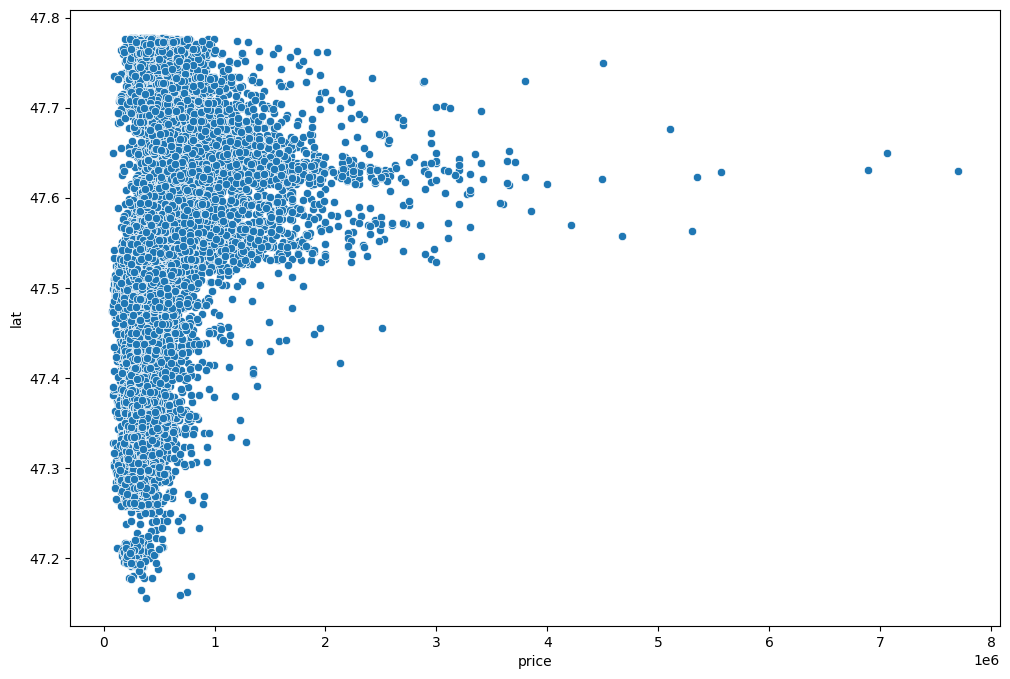

In [15]:
plt.figure(figsize=(12,8))
# sns.scatterplot(x='price',y='lat',data=df)
sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

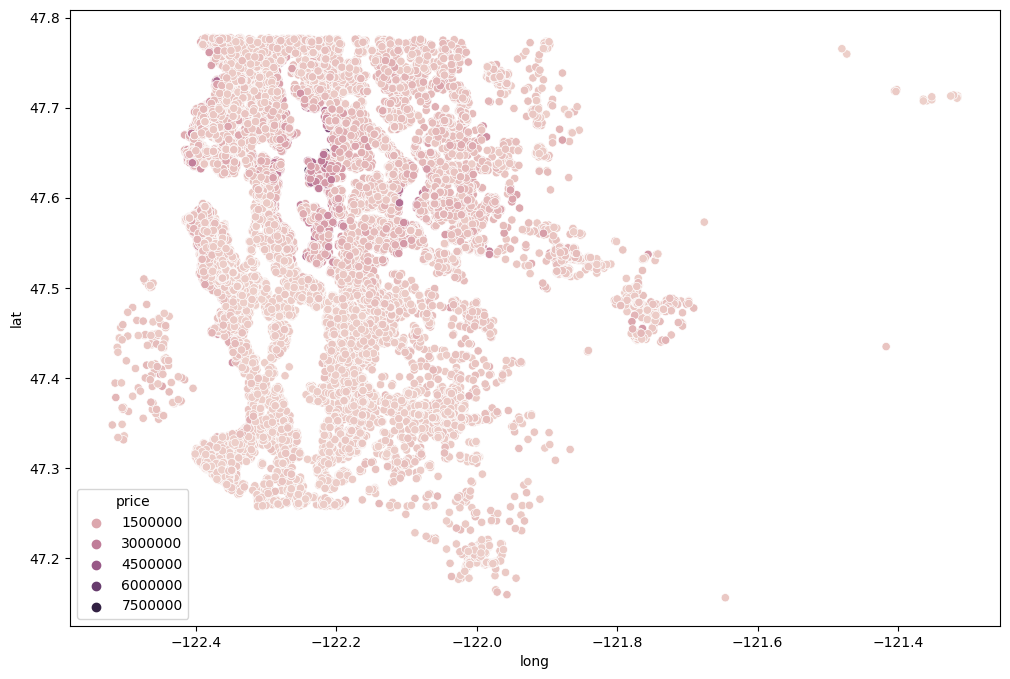

In [16]:
plt.figure(figsize=(12,8))
# sns.scatterplot(x='long',y='lat',data=df,hue='price')
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [17]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [18]:
len(df)*(0.01)

215.97

In [19]:
# non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]
non_top_1_perc = df.sort_values('price', ascending=False).loc[216:] # eliminate the top price houses

<Axes: xlabel='long', ylabel='lat'>

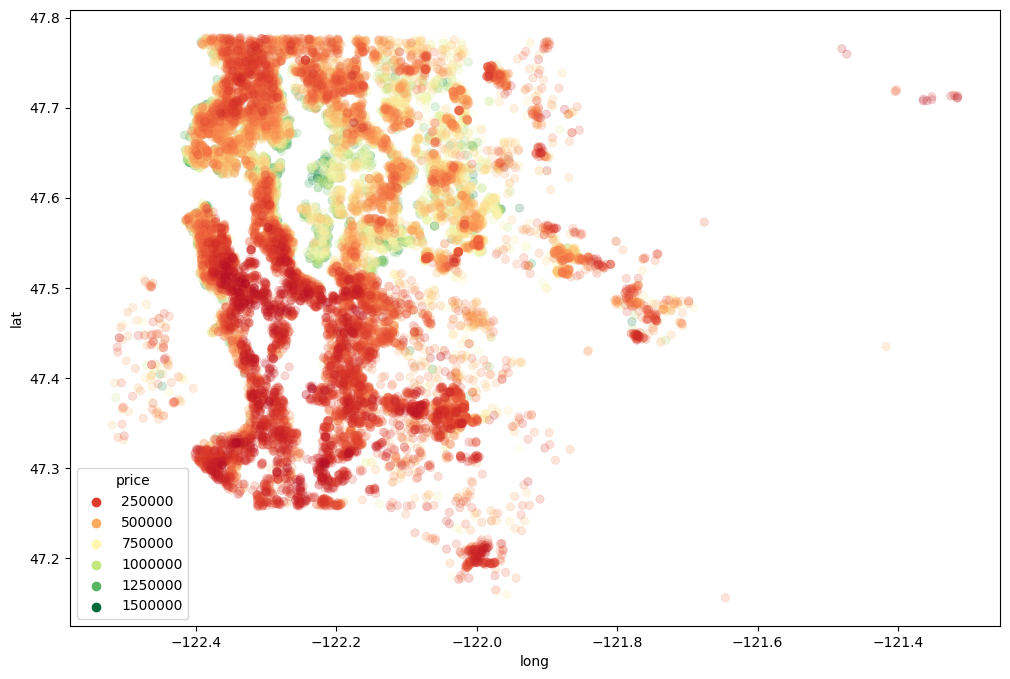

In [20]:
plt.figure(figsize=(12,8))
# sns.scatterplot(x='long',y='lat',
#                 data=non_top_1_perc,hue='price',
#                 palette='RdYlGn',edgecolor=None,alpha=0.2)
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')

### Other Features

<Axes: xlabel='waterfront', ylabel='price'>

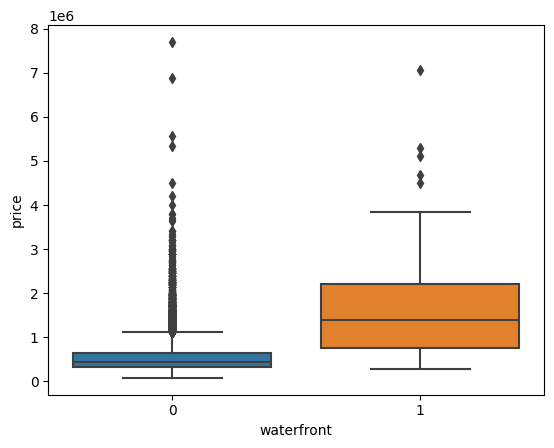

In [21]:
# sns.boxplot(x='waterfront',y='price',data=df)
sns.boxplot(x='waterfront', y='price', data=df)

## Working with Feature Data

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
# df = df.drop('id',axis=1)
df = df.drop('id', axis=1) # Because it´s not importnat

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

### Feature Engineering from Date

In [27]:
# df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime(df['date'])

In [28]:
# df['month'] = df['date'].apply(lambda date:date.month)
df['month'] = df['date'].apply(lambda date: date.month)

In [29]:
# df['year'] = df['date'].apply(lambda date:date.year)
df['year']  = df['date'].apply(lambda date: date.year)

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<Axes: xlabel='year', ylabel='price'>

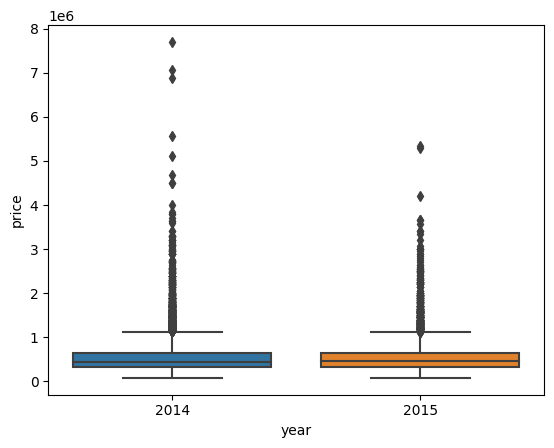

In [31]:
# sns.boxplot(x='year',y='price',data=df)
sns.boxplot(x='year', y='price', data=df)

<Axes: xlabel='month', ylabel='price'>

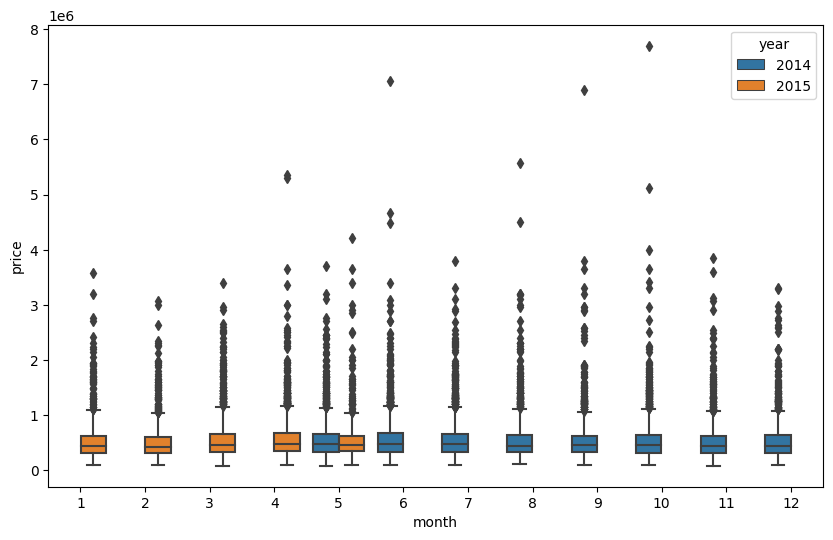

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df, hue='year')

<Axes: xlabel='month'>

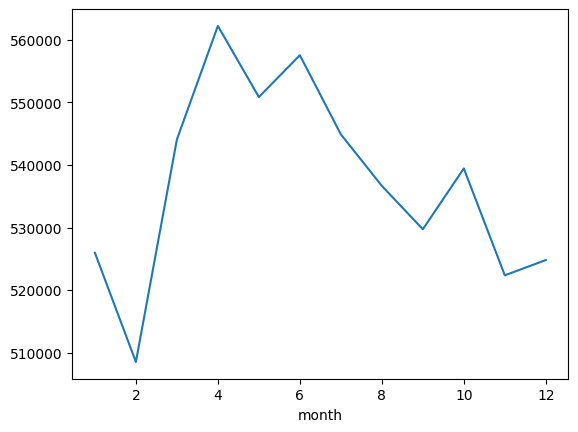

In [33]:
# df.groupby('month').mean()['price'].plot()
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

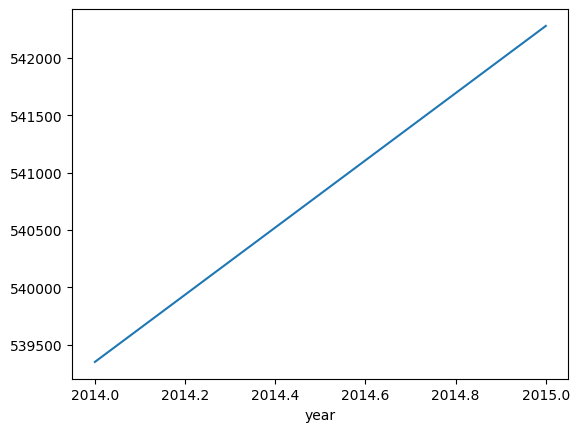

In [34]:
df.groupby('year').mean()['price'].plot()

In [35]:
# df = df.drop('date',axis=1)
df = df.drop('date', axis=1)

In [36]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [37]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [38]:
df = df.drop('zipcode',axis=1)

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [40]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [41]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

## Scaling and Train Test Split

In [42]:
# X = df.drop('price',axis=1)
# y = df['price']
X = df.drop('price', axis=1).values
y = df['price'].values

In [43]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
# Scaling post split that way we only fit to the training set to prevent data leakage from the test set


# Here is other why scaling/Normalize is AFTER split data:

"""Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.

This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. 
Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.

[Precision thanks to Neil's comment] When normalizing the test set, one should apply the normalization parameters previously obtained
 from the training set as-is. Do not recalculate them on the test set, because they would be inconsistent with the model and this would
 produce wrong predictions.

 reference: https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split
"""

"Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.\n\nThis is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. \nUsing any information coming from the test set before or during training is a potential bias in the evaluation of the performance.\n\n[Precision thanks to Neil's comment] When normalizing the test set, one should apply the normalization parameters previously obtained\n from the training set as-is. Do not recalculate them on the test set, because they would be inconsistent with the model and this would\n produce wrong predictions.\n\n reference: https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split\n"

In [46]:
scaler = MinMaxScaler()

In [47]:
X_train= scaler.fit_transform(X_train)

In [48]:
X_test = scaler.transform(X_test)

In [49]:
X_train.shape

(15117, 19)

In [50]:
X_test.shape

(6480, 19)

## Creating a Model

In [51]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [52]:
# model = Sequential()

# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))
# model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')

model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

## Training the Model

In [53]:
# model.fit(x=X_train,y=y_train.values,
#           validation_data=(X_test,y_test.values),
#           batch_size=128,epochs=400)

model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128, # The smaller the batch size, the longer training is goint to take, but the less likey youre going to ver fit to your data because yore no t passing in ypur entire training set at once
           epochs=400) 

Epoch 1/400
119/119 [==============================] - 3s 7ms/step - loss: 430229192704.0000 - val_loss: 418859974656.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 428427968512.0000 - val_loss: 412624650240.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 403690389504.0000 - val_loss: 356479401984.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 291970220032.0000 - val_loss: 191994937344.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 136394317824.0000 - val_loss: 98290655232.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 99290595328.0000 - val_loss: 94720491520.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 97027203072.0000 - val_loss: 93087440896.0000
Epoch 8/400
119/119 [==============================] - 0s 4ms/step - loss: 95184764928.0000 - val_loss: 91330314240.0000
Epoch 9/400
119/119 [==

In [54]:
losses = pd.DataFrame(model.history.history)

In [66]:
losses.head()

,loss,val_loss
0,4.302292e+11,4.188600e+11
1,4.284280e+11,4.126247e+11
2,4.036904e+11,3.564794e+11
3,2.919702e+11,1.919949e+11
4,1.363943e+11,9.829066e+10


<Axes: >

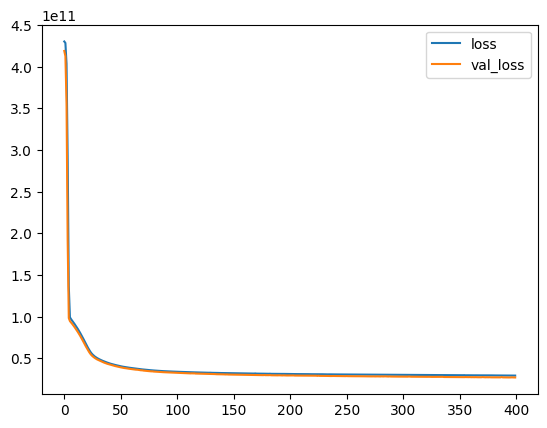

In [55]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [67]:
# from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

#### Predicting on Brand New Data

In [68]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [69]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 2ms/step


In [70]:
mean_absolute_error(y_test,predictions)

101573.04020423419

In [60]:
np.sqrt(mean_squared_error(y_test,predictions))

164434.48143911717

In [71]:
# explained_variance_score(y_test,predictions)
explained_variance_score(y_test, predictions)

0.7962719271307319

In [62]:
df['price'].mean()

540296.5735055795

In [63]:
df['price'].median()

450000.0

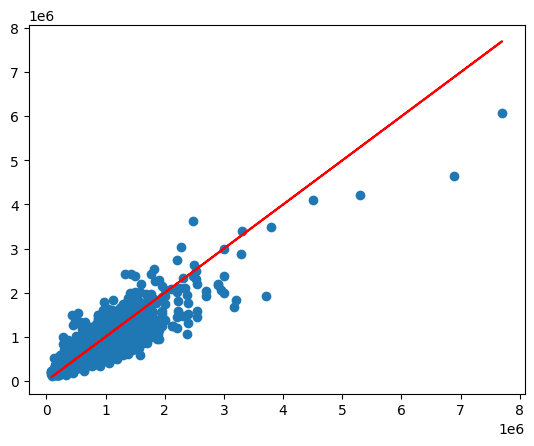

In [64]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [65]:
errors = y_test.values.reshape(6480, 1) - predictions

AttributeError: 'numpy.ndarray' object has no attribute 'values'

C:\Users\david\AppData\Local\Temp\ipykernel_13336\2392254718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: ylabel='Density'>

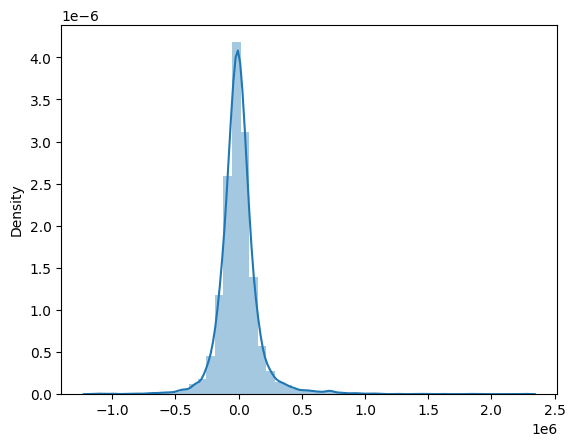

In [ ]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

c:\Users\david\OneDrive\Cursos\Python\Python Bootcamp\python_bootcamp\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [ ]:
model.predict(single_house)

1/1 [==============================] - 0s 62ms/step


array([[283971.22]], dtype=float32)

In [ ]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64